In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
import torch.nn as nn
import context
from diffusion_models.models import ForwardDiffusion

In [2]:
img = "/home/pel1yh/Pictures/output7.png"
img2 = "/home/pel1yh/Pictures/output8.png"
img = read_image(img) / 255
img2 = read_image(img2) / 255

In [3]:
img.shape

torch.Size([4, 246, 515])

In [4]:
batch = torch.stack([img, img], dim=0)

In [5]:
batch.shape

torch.Size([2, 4, 246, 515])

In [6]:
device = torch.device("cuda")

noiser = ForwardDiffusion(timesteps=5000).to(device)
batch = batch.to(device)

In [7]:
noisies = [noiser.forward(batch[0], i*500).permute(1,2,0) for i in range(7)]

In [12]:
batch.shape

torch.Size([2, 4, 246, 515])

In [13]:
noiser.forward(batch, 4000).shape

torch.Size([2, 4, 246, 515])

In [8]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [9]:
blub = [r"$x_{} \sim q(x_{})$".format("{"+str(0)+"}", "{"+str(0)+"}")]
titles = [
    r"$x_{} \sim q(x_{}\mid x_{})$".format("{"+str(i)+"}", "{"+str(i)+"}", "{"+str(i-1)+"}") for i in [j*500 for j in range(1, 7)]
]
blub.extend(titles)

In [10]:
len(noisies), len(blub)

(7, 7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/tmp/ipykernel_28919/2371274267.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


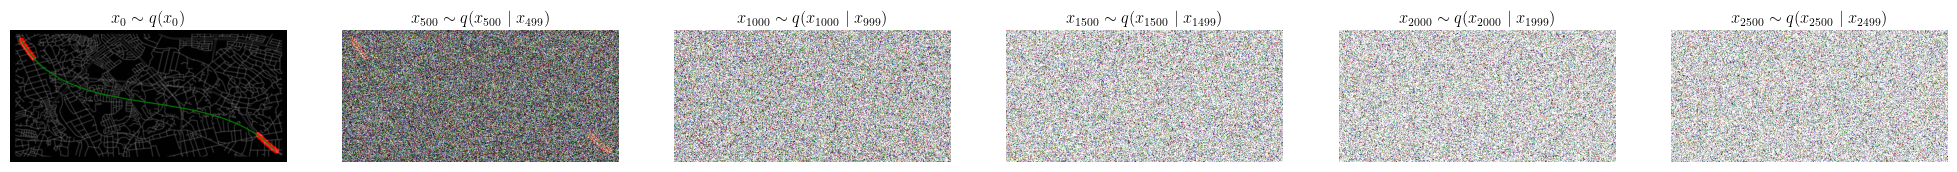

In [13]:
fig, ax = plt.subplots(1,6,figsize=(25,5))
for i, (elem, title) in enumerate(zip(noisies[:-1], blub[:-1])):
    ax[i].imshow(elem.cpu())
    ax[i].axis("off")
    ax[i].set_title(title)
fig.show()

In [12]:
#fig.savefig("/Users/lionelpeer/Documents/Development/diffusionmodels/thesis/img/forward_naoshima.png")